In [1]:
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import  MiniBatchKMeans
import numpy as np
import pandas as pd
from joblib import dump, load
import sys
%autosave 0 

Autosave disabled


In [2]:


class HMM (object):
             def __init__(self,A,B,PI):
                 self.A=A
                 self.B=B
                 self.PI=PI   
def viterbi(obs,Modelo1,PI):
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(int(path))
def cuantizar_xy(xy, cc):
    xycuant=cc
    out=np.power(xycuant-xy,2).sum(axis=1).argmin()
    return out
    
def path_to_xy(path,ccxy):
    estimated= pd.DataFrame(path.astype(int).T)
    estimated.columns=['Path_vit']
    estimated['xcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,0])
    estimated['ycuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,1])                             
    estimated['thcuant'] = estimated['Path_vit'].apply(lambda x: ccxy[x,2])                             
    return (estimated)
def quantized(xyth,ccxyth):
    xythcuant=np.argmin(np.linalg.norm(xyth-ccxyth,axis=1))
    x,y=ccxyth[xythcuant,:2]
    return ((x,y),(xythcuant))
def viterbi(obs,Modelo1,PI):
    A, B= Modelo1.A , Modelo1.B
    
    delta=np.zeros((len(obs)+1,len(Modelo1.A)))
    phi=np.zeros((len(obs)+1,len(A)))+666
    path =np.zeros(len(obs)+1)
    T=len(obs)
    Modelo1.PI = PI
    delta[0,:]= Modelo1.PI * Modelo1.B[:,obs[0]]
    phi[0,:]=666
    for t in range(len(obs)):
        for j in range(delta.shape[1]):

            delta [t+1,j]=np.max(delta[t] * A[:,j]) * B[j,obs[t]]
            phi[t+1,j]= np.argmax(delta[t] * A[:,j])
    path[T]=int(np.argmax(delta[T,:]))
    for i in np.arange(T-1,0,-1):
        #print (i,phi[i+1,int(path[i+1])])
        path[i]=phi[i+1,int(path[i+1])]
    return(path)



In [3]:
def Markov_A_2_grafo(A,ccxyth):
    dists=np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range (A.shape[1]):
            if A[i,j]!=0 :
                dists[i,j]= np.linalg.norm(ccxyth[i]-ccxyth[j])    
    
    
    con = np.where(dists==0,np.inf,dists)
    graphe2=grafo(ccxyth,con)
    return graphe2


class node(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
        
class grafo (object):
             def __init__(self,nodos,conec):
                 self.nodos=nodos
                 self.conec=conec        

def dijkstra(nodoinicial,nodofinal,graphe):
    

    numnodos= len(graphe.nodos)
    con = graphe.conec
    D= np.ones(numnodos)*np.inf
    Prv= np.ones(numnodos)*np.inf
    V= np.zeros(numnodos)
    a = nodoinicial
    D[a]=0
    Prv[a]=0
    Prv[np.where(con[a]!=np.inf)]=a
    V[a]=1
    Dacc=D[a]
    ########
    D=np.minimum(D,con[a]+D[a])
    cont=0
    sucess=False
    while(sucess==False):
        a = np.argmin(D+np.where (V==1,np.inf, V))
        Dacc=D[a]
        Prv[np.where(D>(con[a]+Dacc) )]=a
        V[a]=1
        D=np.minimum(D,con[a]+Dacc)
        if (a== nodofinal):
            print("RUTA CALCULADA ")
            sucess=True
    rutainv=[]
    rutainv.append(nodofinal)
    while(rutainv[-1]!=nodoinicial):
        prv=Prv[int(rutainv[-1])]
        rutainv.append(prv)

    ruta=[]
    for n in reversed(rutainv):
        ruta.append(n)
    return(ruta)

def plot_cc_arrow(cc):
    fig=plt.figure(figsize=(10,10))
    for c in cc:
        ang=c[2]*180/math.pi
        

        plt.plot(c[0], c[1], marker=(3, 1,ang ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2]+math.pi/2)), c[1]-(.01*np.sin(c[2]+math.pi/2)), marker=(1, 1,ang), markersize=25,c='green', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

In [4]:
both=False
data=pd.read_csv('dataset_candidatura_wr/fast_load.csv')

#data=data2
data=data.iloc[:,1:]


n_reads=721
n_reads


"""



####
#index = data[data.y<-1].index
#data=data.drop(index)
data.describe()



#####

xyth=data[['x','y','theta']]

lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,5)
data.iloc[:,0:n_reads]=lecs
"""
data.describe()



,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
count,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,...,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000,14136.000000
mean,1.968981,1.974375,1.974785,1.974469,1.973830,1.971698,1.969295,1.968657,1.965194,1.964131,...,1.847477,1.848528,1.849610,1.850703,1.356175,2.452435,0.144713,9.231961,109.939304,153.304329
std,1.049878,1.057772,1.059869,1.061713,1.061752,1.060802,1.059844,1.060608,1.059701,1.059111,...,0.940018,0.941696,0.944158,0.946312,0.774155,1.350172,1.878428,5.709092,73.692934,92.706014
min,0.426443,0.426465,0.426445,0.424923,0.424836,0.424520,0.423348,0.423476,0.422594,0.422392,...,0.355293,0.351181,0.348181,0.349226,-0.196506,-0.069274,-3.141372,0.000000,0.000000,0.000000
25%,1.244837,1.244395,1.243781,1.242657,1.242888,1.241186,1.240283,1.240331,1.239902,1.241728,...,1.218699,1.219602,1.220703,1.224061,0.842793,1.006371,-1.528835,4.000000,44.000000,72.000000
50%,1.752799,1.754201,1.755181,1.756971,1.757669,1.757518,1.757012,1.751673,1.745272,1.746330,...,1.723620,1.728746,1.730286,1.731057,1.247488,2.793368,0.167726,9.000000,103.000000,153.000000
75%,2.489995,2.485551,2.478290,2.470875,2.463181,2.455865,2.448519,2.441354,2.434042,2.426596,...,2.251352,2.257604,2.263259,2.267050,2.063946,3.741621,1.729399,14.000000,169.000000,242.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,2.773765,4.515830,3.141566,19.000000,255.000000,317.000000


In [5]:
print( 'There are ',data.isnull().sum().sum(),'nans','removing')
data.fillna(0,inplace=True)
print( 'There are ',data.isnull().sum().sum(),'nans','left')
lecs=data.iloc[:,0:n_reads]
lecs=np.clip(lecs,0,10)
data.iloc[:,0:n_reads]=lecs


('There are ', 0, 'nans', 'removing')
('There are ', 0, 'nans', 'left')


In [6]:
ccxyth,ccvk=np.load('ccxyth.npy'),np.load('ccvk.npy')
clf=load('aff_prop_class.joblib') ##PYTHON VERSION 2 

obs,est= data['Vk'].values,data['Y'].values
obs_aff= data['Vk_aff'].values
data['Y'].describe()   

count    14136.000000
mean         9.231961
std          5.709092
min          0.000000
25%          4.000000
50%          9.000000
75%         14.000000
max         19.000000
Name: Y, dtype: float64

In [7]:
data.head()

,R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R717,R718,R719,R720,x,y,theta,Y,Vk,Vk_aff
0,0.884895,0.882944,0.881031,0.879156,0.877319,0.875520,0.873757,0.872031,0.870342,0.868688,...,3.376319,3.352007,3.328156,3.304753,2.355445,4.095427,1.734082,6,169,49
1,0.884872,0.882922,0.881012,0.879139,0.877304,0.875506,0.873746,0.872022,0.870334,0.868683,...,3.374903,3.350619,3.326794,3.303416,2.355416,4.095451,1.734425,6,169,49
2,0.884840,0.882892,0.880984,0.879113,0.877280,0.875485,0.873726,0.872005,0.870319,0.868670,...,3.373422,3.349166,3.325369,3.302019,2.355390,4.095482,1.734785,6,169,49
3,0.884801,0.882857,0.880950,0.879082,0.877252,0.875458,0.873702,0.871983,0.870299,0.868652,...,3.371853,3.347628,3.323860,3.300539,2.355371,4.095522,1.735171,6,169,49
4,0.884759,0.882817,0.880913,0.879047,0.877219,0.875428,0.873674,0.871957,0.870276,0.868631,...,3.370189,3.345995,3.322259,3.298968,2.355348,4.095561,1.735578,6,169,49


In [8]:

data.to_csv('dataset_candidatura_wr/fast_load.csv')


In [9]:
save=True

In [10]:
####BAUM WELCH APPROX###############???!?!?!
if save:
    N=est.max()+1 
    K_corpus= obs.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est)+.00001)

    A,B=TRANS,EMIS
    PI=np.ones(N)/N
    Modelo1=HMM(A,B,PI)




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A.npy',Modelo1.A)
    np.save('B.npy',Modelo1.B)
    np.save('PI.npy',Modelo1.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A.npy'),np.load('B.npy'),np.load('PI.npy')
    Modelo1=HMM(A,B,PI)
B.shape

MODEL SAVED


(20, 256)

In [11]:
obs2=data.Vk_aff.values
if save:
    ####BAUM WELCH APPROX  AFF PROP###############???!?!?!
    
    N=est.max()+1 
    K_corpus= obs2.max()+1
    TRANS=np.zeros((N,N))
    for i in range (N):
        fromTO=[]


        indices=np.asarray(np.where(est==i)).ravel()


        for indice in indices:

            if (int(indice)==len(est)-1):

                indice=indice-1

            fromTO.append(est[indice+1])
        fromTO.append(0)
        fromTO.append(N-1)
        aux=np.asarray(np.bincount(fromTO    ))
        aux[0]=aux[0]-1
        aux[N-1]=aux[N-1]-1

        TRANS[i,:]=aux
    TRANS=TRANS/TRANS.sum(axis=1)
    #####################################3
    EMIS= np.zeros((N,K_corpus))
    for Vk in range (K_corpus):

        indices=np.asarray(np.where(obs2==Vk)).ravel()
        estconvk= est[indices]

        numestenvk=np.bincount(estconvk)
        if (N-len(numestenvk)>0):
            numestenvk=np.append(numestenvk, np.zeros(N-len(numestenvk)))
        EMIS[:,Vk]=(numestenvk/np.bincount(est))

    A,B=TRANS,EMIS
    PI=np.ones(N)/N

    Modelo2= HMM(A,B,PI)
    Modelo2.B=B
    Modelo2.A=A




    #np.linalg.norm(Modelo1.A-Modelo2.A)
    np.save('A2.npy',Modelo2.A)
    np.save('B2.npy',Modelo2.B)
    np.save('PI2.npy',Modelo2.PI)
    print("MODEL SAVED")
else:
    A,B,PI = np.load('A2.npy'),np.load('B2.npy'),np.load('PI2.npy')
    Modelo2=HMM(A,B,PI)
B.shape

MODEL SAVED


(20, 318)

In [12]:
def accuracy(yhat,ytrue):
    weights=[.5,.3,.1,.05,.05]
    if len (yhat)>=5:
        yhat=yhat[-5:]
        ytrue=ytrue[-5:]
        accuracy=np.dot((yhat==ytrue),weights)
        return accuracy



In [13]:


buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))
    

9463
(1.0, 0.5)


In [14]:
len(obs_windowed)

150

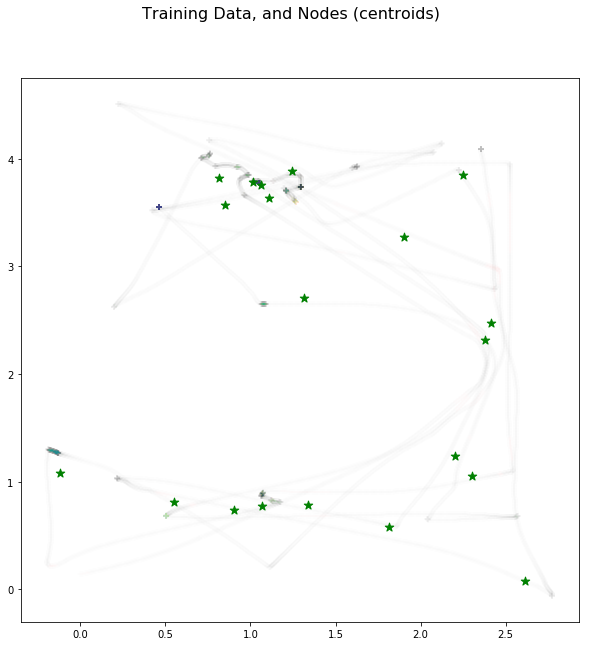

In [15]:
cc=ccxyth
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Data, and Nodes (centroids)', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)





cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='*',s=80,c='g')



In [16]:

def plot_cc_arrow(cc):
    fig=plt.figure(figsize=(10,10))
    for c in cc:
        ang=c[2]*180/math.pi
        

        plt.plot(c[0], c[1], marker=(3, 1,ang + 90 ), markersize=10,c='green', linestyle='None')
        plt.plot(c[0]-(.01*np.cos(c[2])), c[1]-(.01*np.sin(c[2])), marker=(1, 1,ang+ 90), markersize=25,c='green', linestyle='--')
        #plt.plot(c[0]-(.01*np.cos(c[2]+.5*math.pi)), c[1]-(.01*np.sin(c[2]+.5*math.pi)), marker=(1, 1,ang), markersize=25,c='blue', linestyle='--')

    #plt.xlim([0,4])
    #plt.ylim([0,4])

    plt.show()

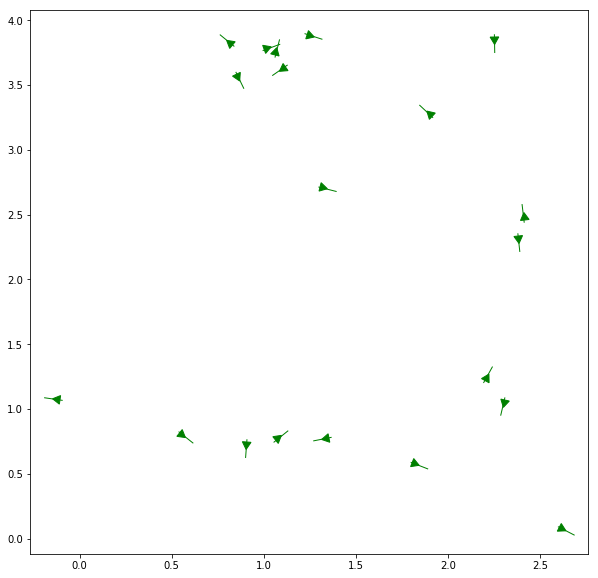

In [17]:
fig=plt.figure(figsize=(10,10))
plot_cc_arrow(cc)


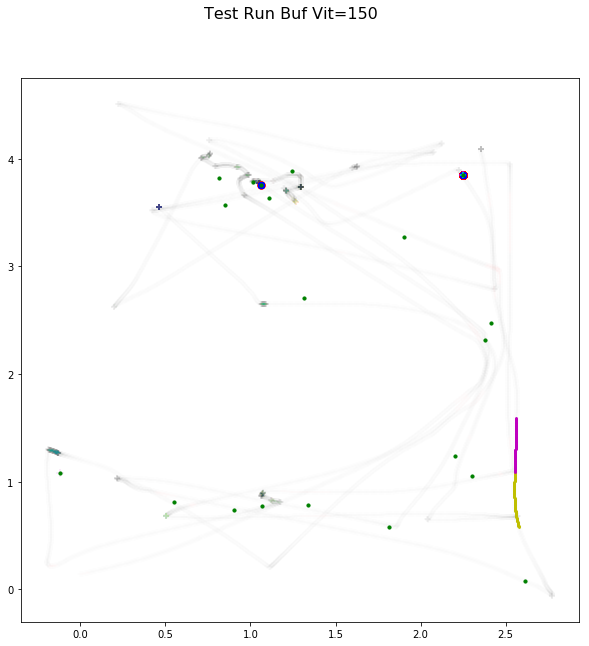

In [18]:
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)  #Modelo 2 uses obs2
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=150', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.00313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 , )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='m',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='b' ,alpha=1)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')
cords3=path_to_xy(np.arange(0,Modelo1.A.shape[0]),cc)
ax1.scatter(x= cords3.xcuant, y=cords3.ycuant ,marker='.',s=40,c='g')



In [19]:



buf_vit=60
for i in range(1):
    
    
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs2[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))

9463
(1.0, 1.0)


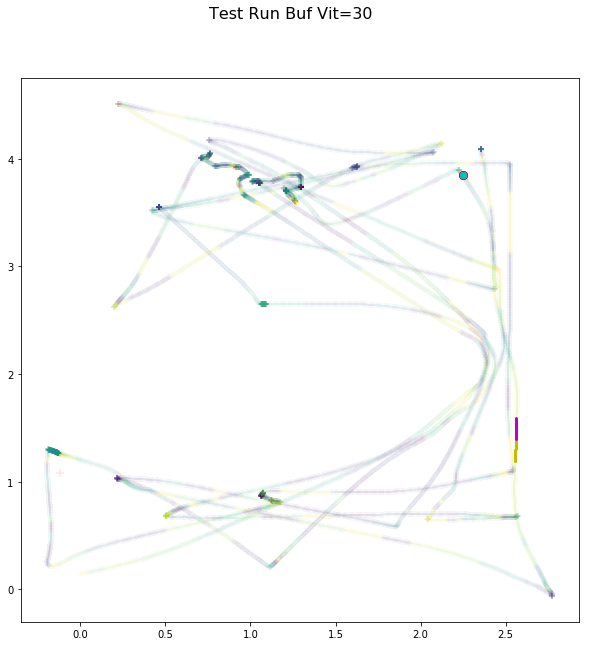

In [20]:
paths= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
path=paths[int(-len(paths)/2):]
path_bigdelay = paths[:int(-len(paths)/2)]
cords= path_to_xy(path,cc)
cords_bigdelay = path_to_xy(path_bigdelay,cc)
cords1=path_to_xy(est_windowed.T[int(-len(paths)/2):],cc)
cords1delay=path_to_xy(est_windowed.T[:int(-len(paths)/2)],cc)



fig = plt.figure(figsize=(10,10))
fig.suptitle('Test Run Buf Vit=30', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.0313)

ax1.scatter(x=cords.xcuant, y=cords.ycuant, marker='o',c='r',s=52,alpha=.5 )
ax1.scatter(x=cords_bigdelay.xcuant, y=cords_bigdelay.ycuant, marker='+',c='r',s=52,alpha=.1 )
ax1.scatter(x=cords1.xcuant, y=cords1.ycuant, marker='o',c='c' ,alpha=.5)
ax1.scatter(x=cords1delay.xcuant, y=cords1delay.ycuant, marker='+',c='c' ,alpha=.1)



ax1.scatter(x= odomreal.x[int(-len(paths)/2):], y=odomreal.y[int(-len(paths)/2):],marker='.',s=13,c='y')
ax1.scatter(x= odomreal.x[:int(-len(paths)/2)], y=odomreal.y[:int(-len(paths)/2)],marker='.',s=13,c='m')



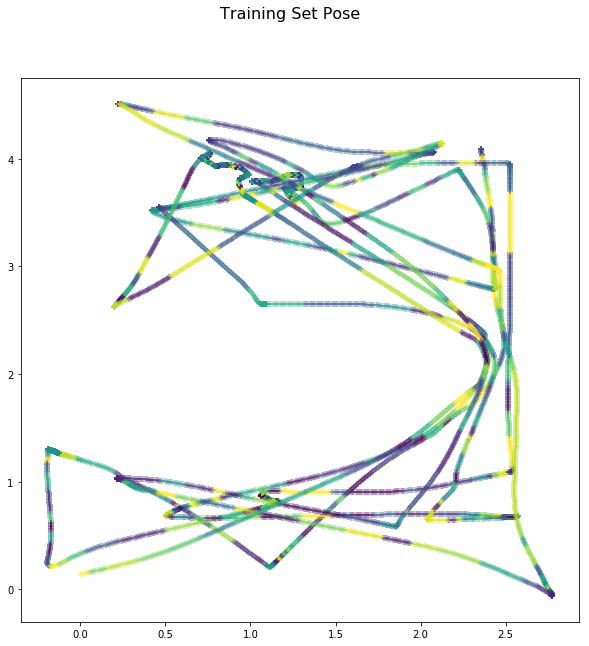

In [21]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Pose', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Y,alpha=.3)


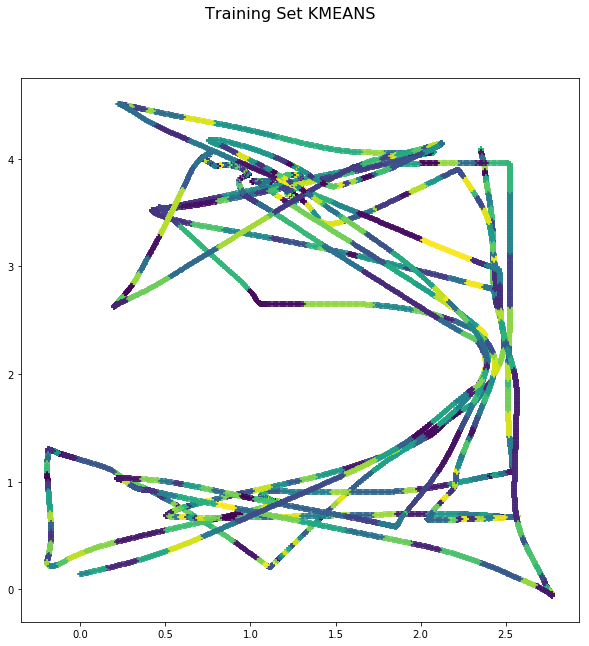

In [22]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set KMEANS', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk)


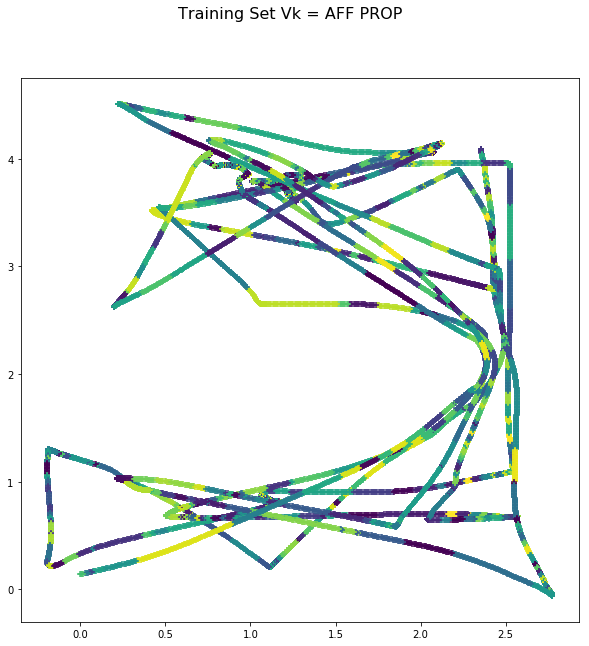

In [23]:


fig = plt.figure(figsize=(10,10))
fig.suptitle('Training Set Vk = AFF PROP', fontsize=16)

ax1 = fig.add_subplot(111)
ax1.scatter(x= data.x, y=data.y,marker='+',c=data.Vk_aff)


In [24]:
#lec=np.load('lec.npy')
aux=pd.DataFrame(data.Vk.value_counts())



lec_deseada=aux.index[0]   ###CHOOSING MOST FREQUENT OBSERVATION SYMBOL

lec=data[data.Vk==lec_deseada].sample(n=1,axis=0).iloc[:,:-6].values.ravel()


start_ang=-240/2*np.pi/180
stop_ang= 240/2*np.pi/180
angs=np.linspace(start_ang,stop_ang,num=len(lec))
lec.shape,lec_deseada

((721,), 125)

In [25]:
def plot_lec(lec):
    cordsy, cordsx= np.cos(angs) *  lec ,  np.sin(angs) *  lec
    CORDS=pd.DataFrame((cordsx,cordsy))
    CORDS=CORDS.T
    CORDS.columns=['x','y']
    plt.scatter(CORDS.x , CORDS.y)
    return CORDS.T

In [26]:

lec= data.iloc[1000,0:721].values
lec1= data.iloc[1111,0:721].values

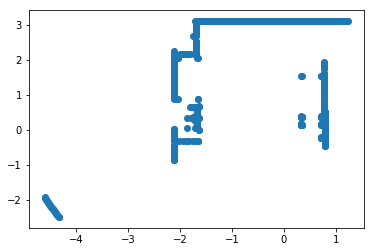

In [27]:
xy=plot_lec(lec1).values

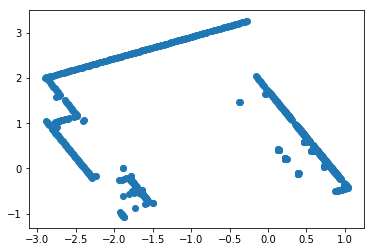

In [28]:
xy_ref=plot_lec(lec).values

In [29]:
def plot_data(data_1, data_2, label_1, label_2, markersize_1=8, markersize_2=8):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.axis('equal')
    if data_1 is not None:
        x_p, y_p = data_1
        ax.plot(x_p, y_p, color='#336699', markersize=markersize_1, marker='o', linestyle=":", label=label_1)
    if data_2 is not None:
        x_q, y_q = data_2
        ax.plot(x_q, y_q, color='orangered', markersize=markersize_2, marker='o', linestyle=":", label=label_2)
    ax.legend()
    return ax

def plot_values(values, label):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(111)
    ax.plot(values, label=label)
    ax.legend()
    ax.grid(True)
    plt.show()
    
def animate_results(P_values, Q, corresp_values, xlim, ylim):
    """A function used to animate the iterative processes we use."""
    fig = plt.figure(figsize=(10, 6))
    anim_ax = fig.add_subplot(111)
    anim_ax.set(xlim=xlim, ylim=ylim)
    anim_ax.set_aspect('equal')
    plt.close()
    x_q, y_q = Q
    # draw initial correspondeces
    corresp_lines = []
    for i, j in correspondences:
        corresp_lines.append(anim_ax.plot([], [], 'grey')[0])
    # Prepare Q data.
    Q_line, = anim_ax.plot(x_q, y_q, 'o', color='orangered')
    # prepare empty line for moved data
    P_line, = anim_ax.plot([], [], 'o', color='#336699')

    def animate(i):
        P_inc = P_values[i]
        x_p, y_p = P_inc
        P_line.set_data(x_p, y_p)
        draw_inc_corresp(P_inc, Q, corresp_values[i])
        return (P_line,)
    
    def draw_inc_corresp(points_from, points_to, correspondences):
        for corr_idx, (i, j) in enumerate(correspondences):
            x = [points_from[0, i], points_to[0, j]]
            y = [points_from[1, i], points_to[1, j]]
            corresp_lines[corr_idx].set_data(x, y)
    
    anim = animation.FuncAnimation(fig, animate,
                                   frames=len(P_values), 
                                   interval=500, 
                                   blit=True)
    return HTML(anim.to_jshtml())

In [30]:
xy.shape

(2, 721)

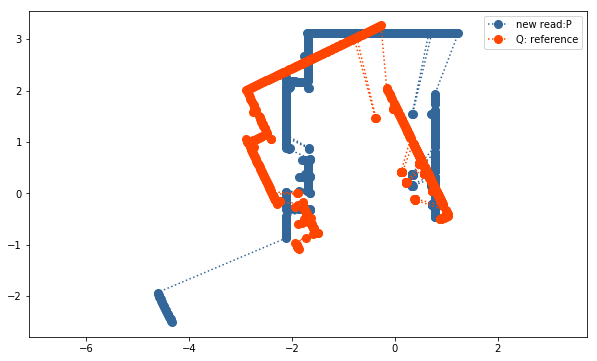

In [31]:

plot_data(xy, xy_ref, "new read:P ", "Q: reference")


In [32]:
def get_correspondence_indices(P, Q):
    """For each point in P find closest one in Q."""
    p_size = P.shape[1]
    q_size = Q.shape[1]
    correspondences = []
    for i in range(p_size):
        p_point = P[:, i]
        min_dist = sys.maxsize
        chosen_idx = -1
        for j in range(q_size):
            q_point = Q[:, j]
            dist = np.linalg.norm(q_point - p_point)
            if dist < min_dist:
                min_dist = dist
                chosen_idx = j
        correspondences.append((i, chosen_idx))
    return correspondences

def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j in correspondences:
        x = [P[0, i], Q[0, j]]
        y = [P[1, i], Q[1, j]]
        if not label_added:
            ax.plot(x, y, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, color='grey')
    ax.legend()

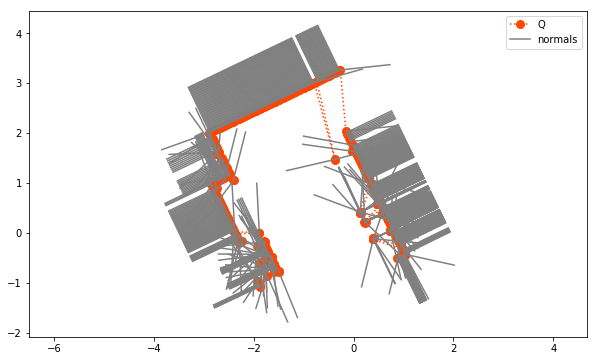

In [33]:
def compute_normals(points, step=1):
    normals = [np.array([[0, 0]])]
    normals_at_points = []
    for i in range(step, points.shape[1] - step):
        prev_point = points[:, i - step]
        next_point = points[:, i + step]
        curr_point = points[:, i]
        dx = next_point[0] - prev_point[0] 
        dy = next_point[1] - prev_point[1]
        normal = np.array([[0, 0],[-dy, dx]])
        normal = normal / np.linalg.norm(normal)
        normals.append(normal[[1], :])  
        normals_at_points.append(normal + curr_point)
    normals.append(np.array([[0, 0]]))
    return normals, normals_at_points

def plot_normals(normals, ax):
    label_added = False
    for normal in normals:
        if not label_added:
            ax.plot(normal[:,0], normal[:,1], color='grey', label='normals')
            label_added = True
        else:
            ax.plot(normal[:,0], normal[:,1], color='grey')
    ax.legend()
    return ax

Q_normals, Q_normals_to_draw = compute_normals(xy_ref)
ax = plot_data(None, xy_ref, None, 'Q')
ax = plot_normals(Q_normals_to_draw, ax)
plt.show()

In [73]:
def prepare_system_normals(x, P, Q, correspondences, Q_normals):
    H = np.zeros((3, 3))
    g = np.zeros((3, 1))
    chi = 0
    for i, j in correspondences:
        p_point = P[:, [i]]
        q_point = Q[:, [j]]
        normal = Q_normals[j]
        e = normal.dot(error(x, p_point, q_point))
        J = normal.dot(jacobian(x, p_point))
        H += J.T.dot(J)
        g += J.T.dot(e)
        chi += e.T * e
    return H, g, chi

def icp_normal(P, Q, Q_normals, iterations=4):
    x = np.zeros((3, 1))
    chi_values = []
    x_values = [x.copy()]  # Initial value for transformation.
    P_values = [P.copy()]
    P_latest = P.copy()
    corresp_values = []
    for i in range(iterations):
        rot = R(x[2])
        t = x[0:2]
        correspondences = get_correspondence_indices(P_latest, Q)
        corresp_values.append(correspondences)
        H, g, chi = prepare_system_normals(x, P, Q, correspondences, Q_normals)
        dx = np.linalg.lstsq(H, -g, rcond=None)[0]
        x += dx
        x[2] = np.arctan2(np.sin(x[2]), np.cos(x[2])) # normalize angle
        chi_values.append(chi.item(0)) # add error to list of errors
        x_values.append(x.copy())
        rot = R(x[2])
        t = x[0:2]
        P_latest = rot.dot(P.copy()) + t
        P_values.append(P_latest)
    corresp_values.append(corresp_values[-1])
    return P_values, chi_values, corresp_values,rot,t



In [74]:
from sympy import init_printing, symbols, Matrix, cos as s_cos, sin as s_sin, diff
def RotationMatrix(angle):
    return Matrix([[s_cos(angle) , -s_sin(angle)], [s_sin(angle), s_cos(angle)]])

x, y, theta, n_x, n_y, p_x, p_y = symbols('x, y, \\theta, n_x, n_y, p_x, p_y')

t = Matrix([[x], [y]])
X = Matrix([x,y,theta])
n = Matrix([[n_x],[n_y]])
p = Matrix([[p_x], [p_y]])

error_point = RotationMatrix(theta) * p + t
error_normal = n.dot(RotationMatrix(theta) * p + t)


In [75]:
def jacobian(x, p_point):
    theta = x[2]
    J = np.zeros((2, 3))
    J[0:2, 0:2] = np.identity(2)
    J[0:2, [2]] = dR(0).dot(p_point)
    return J
def dR(theta):
    return np.array([[-np.sin(theta), -np.cos(theta)],
                     [np.cos(theta),  -np.sin(theta)]])

def R(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta),  np.cos(theta)]]).reshape((2,2))
def error(x, p_point, q_point):
    rotation = R(x[2])
    translation = x[0:2]
    prediction = rotation.dot(p_point) + translation
    return prediction - q_point
Q_normals, Q_normals_to_draw = compute_normals(xy_ref)

P_values, chi_values, corresp_values = icp_normal(xy, xy_ref, Q_normals)

ValueError: too many values to unpack

In [ ]:
correspondences = get_correspondence_indices(P_values[-1], xy_ref)
ax = plot_data(P_values[-1], xy_ref, "Moved data", "True data")
draw_correspondeces(P_values[-1], xy_ref, correspondences, ax)
plt.show()

In [ ]:
cc=np.load('ccxyth.npy')

In [ ]:
cc

In [ ]:
obs2=np.asarray([29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 42, 42, 42, 42, 42, 42, 42, 23, 48, 48, 48, 48, 48, 48])


In [ ]:
Modelo2

In [76]:

viterbi(obs2[-20:-10],Modelo2,PI)

array([ 0., 13., 13., 13., 13., 13., 13., 18., 18., 18., 18.])

In [77]:
from utils_hmm import forw_alg


In [78]:
forw_alg(obs2[5:10],Modelo2)

array([[5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 5.73300573e-04, 6.51580766e-06, 7.85272331e-08,
        1.15854535e-09],
       [5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 1.38017348e-03, 3.66841938e-05, 9.75951335e-07,
        2.60974685e-08],
       [5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e-02, 1.30208333e-04, 3.40234433e-07, 1.53425623e-09,
        3.64369798e-11],
       [5.00000000e-02, 0.0000

In [79]:
buf_vit=150
indice= int(np.random.rand()*(len(obs)-2*buf_vit))
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs_aff[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI)
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))


9210
(0.0, 0.0)


In [80]:
num_particles=6
particles=np.zeros((3,num_particles))
particles[:,0]=cc[np.argmax(Modelo2.B[:,obs2_windowed[-10]])]
particles[:,1]=cc[np.argmax(Modelo1.B[:,obs_windowed[-10]])]
particles[:,2]=cc[np.argmax(Modelo1.B[:,obs_windowed[-1]])]
particles[:,3]=cc[np.argmax(Modelo2.B[:,obs2_windowed[-1]])]
particles[:,4]=cc[int(path2[-10])]
particles[:,5]=cc[int(path2[-1])]
particles=particles.T

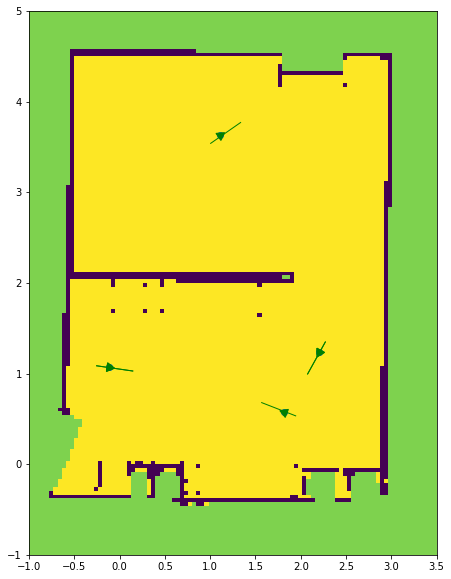

In [81]:
img = plt.imread("map.png")
fig, ax = plt.subplots(1,1,figsize=(10,10))
x = range(300)
ax.imshow(img, extent=[-1, 3.5,-1, 5])
ax.scatter(x=particles[:,0],y=particles[:,1])
for c in particles:
        ang=c[2]*180/math.pi  - 90
        

        ax.plot(c[0], c[1], marker=(3, 1,ang ), markersize=10,c='green', linestyle='None')
        ax.plot(c[0]-(.01*np.cos(c[2]+math.pi/2)), c[1]-(.01*np.sin(c[2]+math.pi/2)), marker=(1, 1,ang), markersize=50,c='green', linestyle='--')



In [82]:
#next Step
indice+= buf_vit 
for i in range(1):
    
   
    obs_windowed= obs[indice:indice+buf_vit]
    obs2_windowed= obs_aff[indice:indice+buf_vit]
    est_windowed= est[indice:indice+buf_vit]
    odomreal= data[['x','y']].iloc[indice:indice+buf_vit]
    #print(data[['x','y']].iloc[indice:indice+buf_vit],est_windowed)

    print(indice)
    #PATH from Model 1 KMEANS CC's obs
    path= viterbi(obs_windowed,Modelo1,Modelo1.PI) #############################NO MANTAIN MODE
    
    ##PATH FROM MODEL 2 WICH NEEDS AFF PORP QUANT OBS
    path2= viterbi(obs2_windowed,Modelo2,Modelo2.PI)###########################NO MANTAIN MODE 
    yhat=np.zeros(len(path)-1)
    yhat2=np.zeros(len(path2)-1)
    ytrue=np.zeros(len(path)-1)
    for i in range(len(path)-1):
        yhat[i]=int(path[i])
        yhat2[i]=int(path2[i])
        ytrue[i]=int(est_windowed[i])
    print(accuracy(ytrue,yhat), accuracy(ytrue,yhat2))


9360
(1.0, 1.0)


In [83]:
num_particles=6
particles=np.zeros((3,num_particles))
particles[:,0]=cc[np.argmax(Modelo2.B[:,obs2_windowed[-10]])]
particles[:,1]=cc[np.argmax(Modelo1.B[:,obs_windowed[-10]])]
particles[:,2]=cc[np.argmax(Modelo1.B[:,obs_windowed[-1]])]
particles[:,3]=cc[np.argmax(Modelo2.B[:,obs2_windowed[-1]])]
particles[:,4]=cc[int(path2[-10])]
particles[:,5]=cc[int(path2[-1])]
particles=particles.T

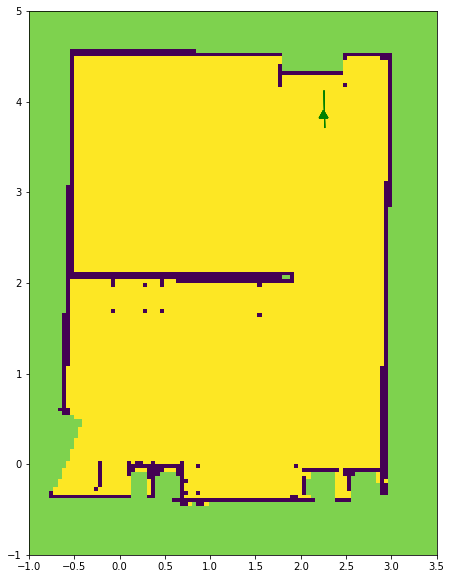

In [84]:
img = plt.imread("map.png")
fig, ax = plt.subplots(1,1,figsize=(10,10))
x = range(300)
ax.imshow(img, extent=[-1, 3.5,-1, 5])
#ax.scatter(x=particles[:,0],y=particles[:,1])
for c in particles:
        ang=c[2]*180/math.pi  - 90
        

        ax.plot(c[0], c[1], marker=(3, 1,ang ), markersize=10,c='green', linestyle='None')
        ax.plot(c[0]-(.01*np.cos(c[2]+math.pi/2)), c[1]-(.01*np.sin(c[2]+math.pi/2)), marker=(1, 1,ang), markersize=50,c='green', linestyle='--')



##### 

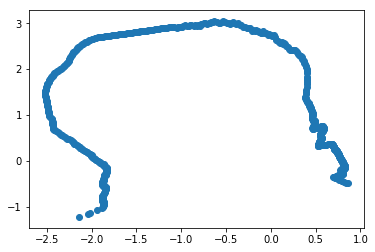

In [85]:
xy_ref=plot_lec(ccvk[np.argmin(np.linalg.norm((lec-ccvk),axis=1))]).values

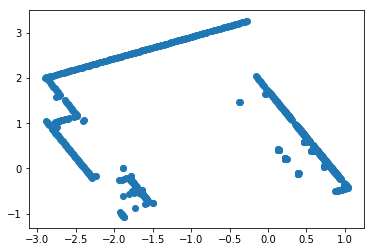

In [86]:
xy=plot_lec(lec).values

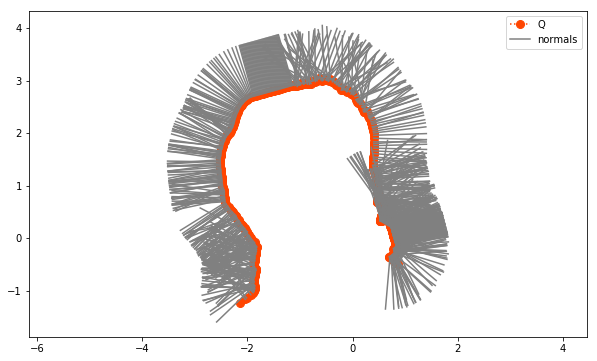

In [87]:
Q_normals, Q_normals_to_draw = compute_normals(xy_ref)
ax = plot_data(None, xy_ref, None, 'Q')
ax = plot_normals(Q_normals_to_draw, ax)
plt.show()

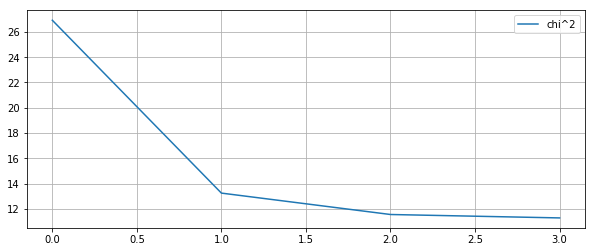

In [89]:

P_values, chi_values, corresp_values,rot,t = icp_normal(xy, xy_ref, Q_normals)
plot_values(chi_values, label="chi^2")


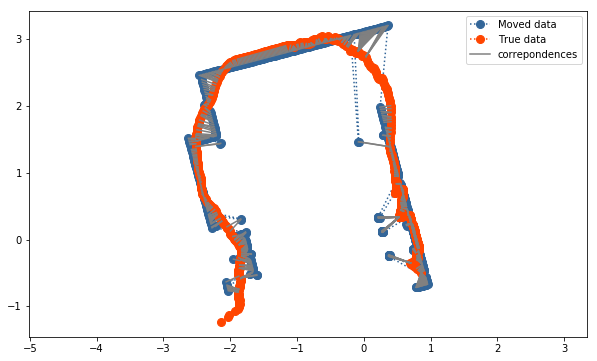

In [59]:
correspondences = get_correspondence_indices(P_values[-1], xy_ref)
ax = plot_data(P_values[-1], xy_ref, "Moved data", "True data")
draw_correspondeces(P_values[-1], xy_ref, correspondences, ax)
plt.show()

In [91]:
rot,t

(array([[ 0.98239526,  0.18681423],
        [-0.18681423,  0.98239526]]), array([[ 0.01338618],
        [-0.05581129]]))

In [60]:
xy_ref[0].shape

(721,)

In [61]:
path_to_xy(np.unique(path),cc).values[:,1:]

array([[-0.12135468,  1.07739561, -0.14380786],
       [ 0.90567933,  0.73172399,  1.49616452],
       [ 1.07048565,  0.77311462, -2.46337075],
       [ 2.20480634,  1.23674477, -2.07622753],
       [ 1.81533135,  0.58154982,  2.77050016],
       [ 2.37864358,  2.31909029,  1.67756924],
       [ 0.81682403,  3.82415263, -0.68565023]])

In [62]:
particles

array([[ 1.81533135,  0.58154982,  2.77050016],
       [ 2.37864358,  2.31909029,  1.67756924],
       [ 1.07048565,  0.77311462, -2.46337075],
       [ 1.07048565,  0.77311462, -2.46337075],
       [-0.12135468,  1.07739561, -0.14380786],
       [-0.12135468,  1.07739561, -0.14380786]])

In [63]:
particles=np.zeros((3,len(ccxyth)))

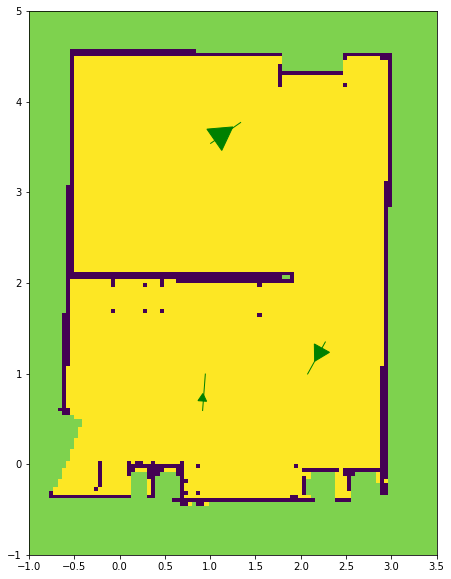

In [71]:

num_beliefs=3
depth=20
alpha=forw_alg(obs_windowed,Modelo1)

aa=pd.Series(alpha[:,depth]).sort_values(ascending=False)
particles=path_to_xy(np.unique(aa.index[-num_beliefs:].values),cc).values[:,1:]
aa.index[-num_beliefs:].values
img = plt.imread("map.png")
fig, ax = plt.subplots(1,1,figsize=(10,10))
x = range(300)
ax.imshow(img, extent=[-1, 3.5,-1, 5])

for i,c  in enumerate(particles):
        ang=c[2]*180/math.pi  - 90
        

        ax.plot(c[0], c[1], marker=(3, 1,ang ), markersize=10*(i+1),c='green', linestyle='None')
        ax.plot(c[0]-(.01*np.cos(c[2]+math.pi/2)), c[1]-(.01*np.sin(c[2]+math.pi/2)), marker=(1, 1,ang), markersize=50,c='green', linestyle='--')


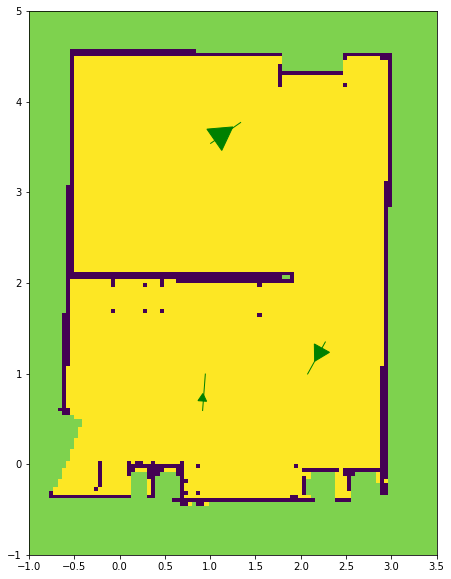

In [ ]:
xy_ref=plot_lec(ccvk[obs_windowed[30]]).values

In [ ]:
#p_map=cv2.threshold(p_map,0.9,1)
ret,thresh = cv2.threshold(p_map,0.9,1,0)

plt.imshow(thresh)


In [ ]:
import cv2

In [ ]:
num_particles=10
particles=np.zeros ((num_particles,3))
img = plt.imread("map.png")
p_map=np.zeros(img.shape)
h,w=p_map.shape
#for x in p
p_map+=img

for x in range(h):
    for y in range(w):
        
        p_map[x,y] += np.exp(-  (   (40-y)**2/5**2 + (100-x)**2/5**2      )          )
        


plt.imshow(p_map)

In [ ]:
particles[:,0]= 2.5*np.random.randn(num_particles)+40
particles[:,1]= 2.5*np.random.randn(num_particles)+100
particles.dtype=int
fig, ax = plt.subplots(1,1,figsize=(10,10))

for part in particles:
   
    p_map[part[1],part[0]]=.2


plt.imshow(p_map)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

for part in particles:
    print part
   
    p_map[part[1],part[0]]=.2


plt.imshow(p_map)

In [ ]:
alpha=forw_alg(obs_windowed,Modelo1)

aa=pd.Series(alpha[:,30]).sort_values(ascending=False)
aa.index[-num_beliefs:].values
#bb.index[-num_beliefs:]

In [ ]:
obs_windowed.shape

In [ ]:
np.argmax(alpha[:,30])

In [ ]:
np.sort(alpha[:,15],)

In [ ]:
aa=pd.Series(alpha[:,30])

In [ ]:
aa[np.argmax(alpha[:,30])]

In [ ]:
num_beliefs=3
for i in range(num_beliefs):
    print i

In [ ]:
bb=aa.sort_values()

In [ ]:
p_map

In [ ]:
bb